# Project 1:

# Predicting 10-Year Coronary Heart Disease Risk, Showcasing Multiple ML Models, HyperParameters And Manual + Auto Tuning
#####
|**Prepared by:**| Rayyan Ahmed
|----------------|------------------------------------------------------|
|**Date:**| 12th Oct, 2024|

###
## Loading DataFrame
###

In [1]:
import pandas as pd

org_df = pd.read_csv('12-pr1-heartattack_CSVDataSet.csv')
org_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,65,2.0,0,0.0,NaN,0,1,0,270.0,165.0,98.0,21.66,62.0,92.0,1
396,1,39,3.0,0,0.0,0.0,0,0,0,202.0,136.5,79.0,24.35,73.0,60.0,0
397,0,47,2.0,1,3.0,0.0,0,0,0,155.0,122.5,77.5,21.34,65.0,78.0,0
398,1,59,1.0,1,43.0,0.0,0,0,0,207.0,132.5,66.0,26.84,65.0,76.0,1


###
## Loading DataFrame Info:
###

In [2]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             400 non-null    int64  
 1   age              400 non-null    int64  
 2   education        391 non-null    float64
 3   currentSmoker    400 non-null    int64  
 4   cigsPerDay       398 non-null    float64
 5   BPMeds           394 non-null    float64
 6   prevalentStroke  400 non-null    int64  
 7   prevalentHyp     400 non-null    int64  
 8   diabetes         400 non-null    int64  
 9   totChol          397 non-null    float64
 10  sysBP            400 non-null    float64
 11  diaBP            400 non-null    float64
 12  BMI              398 non-null    float64
 13  heartRate        400 non-null    float64
 14  glucose          367 non-null    float64
 15  TenYearCHD       400 non-null    int64  
dtypes: float64(9), int64(7)
memory usage: 50.1 KB


###
## DataFrame Null Values:
###

In [3]:
org_df.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
org_df.isnull().sum()

male                0
age                 0
education           9
currentSmoker       0
cigsPerDay          2
BPMeds              6
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             3
sysBP               0
diaBP               0
BMI                 2
heartRate           0
glucose            33
TenYearCHD          0
dtype: int64

###
## Filling Null Values:
###

In [5]:
org_df['education'] = org_df['education'].fillna(org_df['education'].mean())
org_df['cigsPerDay'] = org_df['cigsPerDay'].fillna(org_df['cigsPerDay'].mean())
org_df['BPMeds'] = org_df['BPMeds'].fillna(org_df['BPMeds'].mean())
org_df['totChol'] = org_df['totChol'].fillna(org_df['totChol'].mean())
org_df['BMI'] = org_df['BMI'].fillna(org_df['BMI'].mean())
org_df['glucose'] = org_df['glucose'].fillna(org_df['glucose'].mean())

###
## Null Values After Filling:
###

In [6]:
org_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             400 non-null    int64  
 1   age              400 non-null    int64  
 2   education        400 non-null    float64
 3   currentSmoker    400 non-null    int64  
 4   cigsPerDay       400 non-null    float64
 5   BPMeds           400 non-null    float64
 6   prevalentStroke  400 non-null    int64  
 7   prevalentHyp     400 non-null    int64  
 8   diabetes         400 non-null    int64  
 9   totChol          400 non-null    float64
 10  sysBP            400 non-null    float64
 11  diaBP            400 non-null    float64
 12  BMI              400 non-null    float64
 13  heartRate        400 non-null    float64
 14  glucose          400 non-null    float64
 15  TenYearCHD       400 non-null    int64  
dtypes: float64(9), int64(7)
memory usage: 50.1 KB


###
## Converting DataTypes Into Integers:
###

In [8]:
org_df['education'] = org_df['education'].astype(int)
org_df['cigsPerDay'] = org_df['cigsPerDay'].astype(int)
org_df['BPMeds'] = org_df['BPMeds'].astype(int)
org_df['totChol'] = org_df['totChol'].astype(int)
org_df['sysBP'] = org_df['sysBP'].astype(int)
org_df['diaBP'] = org_df['diaBP'].astype(int)
org_df['BMI'] = org_df['BMI'].astype(int)
org_df['heartRate'] = org_df['heartRate'].astype(int)
org_df['glucose'] = org_df['glucose'].astype(int)

In [9]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   male             400 non-null    int64
 1   age              400 non-null    int64
 2   education        400 non-null    int32
 3   currentSmoker    400 non-null    int64
 4   cigsPerDay       400 non-null    int32
 5   BPMeds           400 non-null    int32
 6   prevalentStroke  400 non-null    int64
 7   prevalentHyp     400 non-null    int64
 8   diabetes         400 non-null    int64
 9   totChol          400 non-null    int32
 10  sysBP            400 non-null    int32
 11  diaBP            400 non-null    int32
 12  BMI              400 non-null    int32
 13  heartRate        400 non-null    int32
 14  glucose          400 non-null    int32
 15  TenYearCHD       400 non-null    int64
dtypes: int32(9), int64(7)
memory usage: 36.1 KB


###
## Seperating Independant Values (x) & Dependant Values (y):
###

In [10]:
x = org_df.drop(['TenYearCHD'], axis = 1)
y = org_df['TenYearCHD']

###
## Splitting Data Into Train & Test Data:
###

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


###
## Shapes:
###

In [12]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 15), (320,), (80, 15), (80,))

<div style="text-align: center; color: red;">
    <h1>=============================================================</h1>
<br>
    <h1>First Applying Machine Learning Models On Unscaled Data:</h1>
    
<br>
    <h1>=============================================================</h1>
</div>


###
## Lets Start...
###

# <p style="text-align: center;">==========================================================<br><br>Model 1<br>Logistic Regression<br><br>==========================================================</p>


###
## Importing Logistic Regression:
###

In [13]:
from sklearn.linear_model import LogisticRegression

###
## Fitting Model:
###

In [14]:
modelone = LogisticRegression(max_iter = 1000)
modelone.fit(x_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

###
## Predicting Values:
###

In [15]:
modelone.predict(x_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

###
## Actual vs Predicted Values:
###

In [16]:
pd.DataFrame({'Actual Values': y_test, 'Predicted Values': modelone.predict(x_test)}).head(10)

,Actual Values,Predicted Values
209,0,0
280,1,0
33,1,0
210,0,0
93,0,1
84,0,0
329,0,0
94,1,0
266,1,0
126,0,0


###
## ModelOne  Accuracy:
###

In [17]:
print(f'ModelOne Accuracy: {modelone.score(x_test, y_test) * 100:.3f} %')

ModelOne Accuracy: 73.750 %


###
## ModelOne Classification Report:
###

In [18]:
from sklearn.metrics import classification_report


In [19]:
print(classification_report(y_test, modelone.predict(x_test), zero_division = 0))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        59
           1       0.50      0.14      0.22        21

    accuracy                           0.74        80
   macro avg       0.63      0.55      0.53        80
weighted avg       0.69      0.74      0.68        80



# <p style="text-align: center;">==========================================================<br><br>Model 2<br>Logistic Regression 2 (HyperParameters)<br><br>==========================================================</p>


###
## train_test_split:
###

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

###
## Fitting Data On ModelTwo:
###

In [21]:
modeltwo = LogisticRegression(max_iter = 3000, C = 1, tol = 0.0001, solver = 'lbfgs', penalty = 'l2')
modeltwo.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=3000)

###
## Predicting Values:
###

In [22]:
modeltwo.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

###
## Evaluating ModelTwo Performance:
###

In [23]:
print(f'ModelTwo Accuracy: {modeltwo.score(x_test, y_test) *100:.3f} %')

ModelTwo Accuracy: 81.250 %


###
## ModelTwo Classification Report:
###

In [24]:
print(classification_report(y_test, modeltwo.predict(x_test), zero_division = 0))

              precision    recall  f1-score   support

           0       0.82      0.98      0.90        66
           1       0.00      0.00      0.00        14

    accuracy                           0.81        80
   macro avg       0.41      0.49      0.45        80
weighted avg       0.68      0.81      0.74        80



# <p style="text-align: center;">==========================================================<br><br>Model 3<br>Recursive Feature Elimination<br><br>==========================================================</p>


###
## Importing RFE:
###

In [25]:
from sklearn.feature_selection import RFE

###
## train_test_split:
###

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

###
## Fitting With RFE:
###

In [27]:
modelthree = LogisticRegression(max_iter = 2500)
rfe = RFE(estimator = modelthree, n_features_to_select = 4, verbose = 1)
rfe.fit(x_train, y_train)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.


RFE(estimator=LogisticRegression(max_iter=2500), n_features_to_select=4,
    verbose=1)

###
## Checking Selected Features:
###

In [28]:
rfe.support_

array([False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False])

In [29]:
selected_cols = x_train.columns[rfe.support_]
selected_cols

Index(['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes'], dtype='object')

###
## Selected Columns:
###

In [30]:
x_train[selected_cols]

,BPMeds,prevalentStroke,prevalentHyp,diabetes
39,0,0,0,0
167,0,0,0,0
383,0,0,1,0
221,0,0,0,0
351,0,0,0,0
...,...,...,...,...
255,1,1,1,0
72,0,0,0,0
396,0,0,0,0
235,0,0,0,0


###
## Fitting With Selected Columns:
###

In [31]:
modelthree.fit(x_train[selected_cols], y_train)

LogisticRegression(max_iter=2500)

###
## Predicting Values:
###

In [32]:
modelthree.predict(x_test[selected_cols])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

###
## ModelThree Accuracy:
###

In [33]:
print(f'ModelTwo Accuracy: {modelthree.score(x_test[selected_cols], y_test) * 100:.3f} %')


ModelTwo Accuracy: 84.167 %


###
## Advanced RFE:
###

In [34]:
def find_best_feature(n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
    modelthree = LogisticRegression(max_iter = 2500)
    rfe = RFE(estimator = modelthree, n_features_to_select = n, verbose = 1)
    rfe.fit(x_train, y_train)
    selected_col = x_train.columns[rfe.support_]

    modelthree.fit(x_train[selected_col], y_train)
    score = modelthree.score(x_test[selected_col], y_test)
    print('Selected Columns:', list(selected_col))
    print(f'Score: {score * 100:.3f} %')
    print(f'n: {n}')
    print('-' * 50)

In [35]:
for i in range(1, x.shape[1] + 1):
    print(f'{i}) ')
    find_best_feature(i)

1) 
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Selected Columns: ['prevalentHyp']
Score: 84.167 %
n: 1
--------------------------------------------------
2) 
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features

###
## Results OF RFE:
7) 

Fitting estimator with 15 features.

Fitting estimator with 14 features.

Fitting estimator with 13 features.

Fitting estimator with 12 features.

Fitting estimator with 11 features.

Fitting estimator with 10 features.

Fitting estimator with 9 features.

Fitting estimator with 8 features.

Selected Columns: ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

Score: 85.833 %

n: 7

**Result:**

To get Model Accuracy of 85.833 %:

* Best Model: modelthree
* Best n_features_to_select = 7
* Verbose = 1
* Selected Columns: ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

###

###
## Preparing Model According To RFE Results:
###

In [36]:
# Best Columns A/C To RFE Results:

sel_cols = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [37]:
modelthree = LogisticRegression(max_iter = 3000, C = 1, tol = 0.0001, solver = 'lbfgs', penalty = 'l2')
modelthree.fit(x_train[sel_cols], y_train)

LogisticRegression(C=1, max_iter=3000)

###
## Predicting Values:
###

In [38]:
modelthree.predict(x_test[sel_cols])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

###
## Evaluating ModelThree Performance After Advanced RFE:
###

In [39]:
print(f'ModelThree Accuracy After Advanced RFE: {modelthree.score(x_test[sel_cols], y_test) *100:.3f} %')

ModelThree Accuracy After Advanced RFE: 85.833 %


###
## ModelThree Classification Report:
###

In [40]:
print(classification_report(y_test, modelthree.predict(x_test[sel_cols]), zero_division = 0))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       101
           1       1.00      0.11      0.19        19

    accuracy                           0.86       120
   macro avg       0.93      0.55      0.56       120
weighted avg       0.88      0.86      0.81       120



# <p style="text-align: center;">==========================================================<br><br>Model 4<br>Support Vector Machine<br><br>==========================================================</p>


###
## Checking Whether The Data Is Linear OR Non-Linear:
###

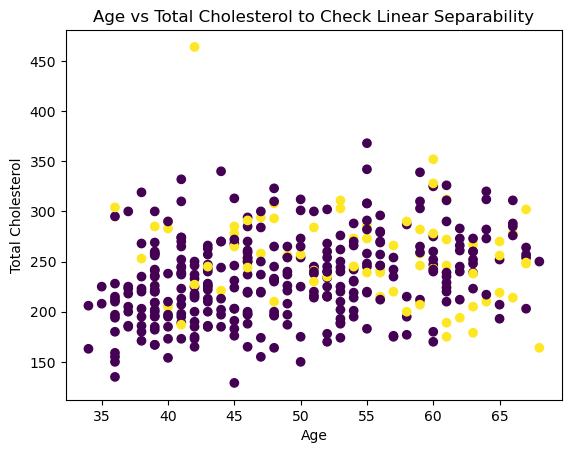

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
org_df = pd.read_csv('12-pr1-heartattack_CSVDataSet.csv')

# Scatter plot using two features (e.g., 'age' and 'totChol')
plt.scatter(org_df['age'], org_df['totChol'], c=org_df['TenYearCHD'], cmap='viridis')

# Label the axes
plt.xlabel('Age')
plt.ylabel('Total Cholesterol')

# Add a title
plt.title('Age vs Total Cholesterol to Check Linear Separability')

# Show the plot
plt.show()


**Therefore,**
* The data points are overlapping each other and there isn't a linear boundary between data points.
* A non-linear boundary could adapt better to the mixed patterns in this dataset.


###
## Using Non-Linear SVM Kernels:
1) kernel='rbf': Specifies the RBF kernel.
2)  kernel='poly', degree=3: Specifies the Polynomial kernel with a degree of 3.
3)  kernel='sigmoid': Specifies the Sigmoid kernel.

###

###
## 1) RBF Kernel:
###

In [42]:
from sklearn.svm import SVC

In [43]:
modelfourrbf = SVC(kernel = 'rbf', max_iter = -1, gamma = 3000, C = 1000, tol = 1)
modelfourrbf.fit(x_train[sel_cols], y_train)

SVC(C=1000, gamma=3000, tol=1)

In [44]:
modelfourrbf.predict(x_test[sel_cols])

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [45]:
print(f'Model Four RBF Accuracy: {modelfourrbf.score(x_test[sel_cols], y_test) *100:.3f} %')

Model Four RBF Accuracy: 84.167 %


###
## 2) Polynomial Kernel:
###

In [46]:
modelfourpoly = SVC(kernel = 'poly', max_iter = 3000, C = 0.10, tol = 0.0001, degree = 3)
modelfourpoly.fit(x_train[sel_cols], y_train)

SVC(C=0.1, kernel='poly', max_iter=3000, tol=0.0001)

In [47]:
modelfourpoly.predict(x_test[sel_cols])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
print(f'Model 4 Poly Accuracy: {modelfourpoly.score(x_test[sel_cols], y_test) * 100:.3f} %')

Model 4 Poly Accuracy: 84.167 %


###
## 3) Sigmoid Kernel:
###

In [49]:
modelfoursigm = SVC(kernel = 'sigmoid', C = 0.0001, gamma = 0.0001, tol = 0.1)
modelfoursigm.fit(x_train[sel_cols], y_train)

SVC(C=0.0001, gamma=0.0001, kernel='sigmoid', tol=0.1)

In [50]:
modelfoursigm.predict(x_test[sel_cols])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(f'Model 4 Sigmoid Accuracy: {modelfoursigm.score(x_test[sel_cols], y_test) * 100:.3f} %')

Model 4 Sigmoid Accuracy: 84.167 %


In [53]:
print(classification_report(y_test, modelfoursigm.predict(x_test[sel_cols]), zero_division = 0))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       101
           1       0.00      0.00      0.00        19

    accuracy                           0.84       120
   macro avg       0.42      0.50      0.46       120
weighted avg       0.71      0.84      0.77       120



# <p style="text-align: center;">==========================================================<br><br>Model 5<br>Randomized Search<br><br>==========================================================</p>


###
## Importing RandomizedSearchCV:
###

In [54]:
from sklearn.model_selection import RandomizedSearchCV

###
## Applying Parameters On RandomizedSearchCV:
###

In [55]:
params = {'C': [0.1, 1, 10], 'max_iter': [10, 100, 1000, 10000], 'kernel': ['rbf', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
modelfiversc = RandomizedSearchCV(SVC(), params, cv = 5, scoring = 'accuracy')
modelfiversc.fit(x_train[sel_cols], y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-proce

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000, 10000],
                                        'kernel': ['rbf', 'poly'],
                                        'max_iter': [10, 100, 1000, 10000]},
                   scoring='accuracy')

###
## Checking Best Estimator, Parameter, Score:
###

In [56]:
print(f'Best Estimator: {modelfiversc.best_estimator_}\nBest Params:  \t{modelfiversc.best_params_}\nBest Score:   \t{modelfiversc.best_score_} ({modelfiversc.best_score_ * 100:.3f} %)')

Best Estimator: SVC(C=0.1, gamma=0.0001, max_iter=100)
Best Params:  	{'max_iter': 100, 'kernel': 'rbf', 'gamma': 0.0001, 'C': 0.1}
Best Score:   	0.7892857142857143 (78.929 %)


###
## Applying Best Estimator:
###

In [57]:
modelfivebe = SVC(C = 0.1, gamma = 0.0001, max_iter=100)
modelfivebe.fit(x_train[sel_cols], y_train)


SVC(C=0.1, gamma=0.0001, max_iter=100)

In [58]:
modelfivebe.predict(x_test[sel_cols])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
print(f'Model 5 RSCV BE: {modelfivebe.score(x_test[sel_cols], y_test) * 100:.3f} %')

Model 5 RSCV BE: 84.167 %


###
## Applying Best Parameters:
###

In [60]:
modelfivebp = SVC(max_iter = 100, kernel = 'rbf', gamma = 0.0001, C = 0.1)
modelfivebp.fit(x_train[sel_cols], y_train)

SVC(C=0.1, gamma=0.0001, max_iter=100)

In [61]:
modelfivebp.predict(x_test[sel_cols])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
print(f'Model 5 RSCV BP: {modelfivebp.score(x_test[sel_cols], y_test) * 100:.3f} %')

Model 5 RSCV BP: 84.167 %


# <p style="text-align: center;">==========================================================<br><br>Model 6<br>Grid Search<br><br>==========================================================</p>


###
## Importing Grid Search CV:
###

In [64]:
from sklearn.model_selection import GridSearchCV

###
## Applying Parameters On Grid Search:
###

In [65]:
params = {'C': [0.1, 1, 10], 'max_iter': [10, 100, 1000, 10000], 'kernel': ['rbf', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
modelsixgs = GridSearchCV(SVC(), params, cv = 5, scoring = 'accuracy')
modelsixgs.fit(x_train[sel_cols], y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-proce

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-proce

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-pr

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-proce

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-p

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider p

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-pr

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-proce

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-pr

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-proce

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider p

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-proce

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-proce

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'kernel': ['rbf', 'poly'],
                         'max_iter': [10, 100, 1000, 10000]},
             scoring='accuracy')

###
## Checking Best Parameters, Estimator & Score:
###

In [66]:
print(f'Best Estimator: {modelsixgs.best_estimator_}\nBest Params:  \t{modelsixgs.best_params_}\nBest Score:   \t{modelsixgs.best_score_} ({modelsixgs.best_score_ * 100:.3f} %)')

Best Estimator: SVC(C=10, gamma=0.001, kernel='poly', max_iter=1000)
Best Params:  	{'C': 10, 'gamma': 0.001, 'kernel': 'poly', 'max_iter': 1000}
Best Score:   	0.8035714285714285 (80.357 %)


###
## Applying Best Estimator:
###

In [67]:
modelsixbe = SVC(C = 10, gamma = 0.001, kernel = 'poly', max_iter = 1000)
modelsixbe.fit(x_train[sel_cols], y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=10, gamma=0.001, kernel='poly', max_iter=1000)

In [68]:
modelsixbe.predict(x_test[sel_cols])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
print(f'Model 6 GSCV BE: {modelsixbe.score(x_test[sel_cols], y_test) * 100:.3f} %')

Model 6 GSCV BE: 80.000 %


###
## Applying Best Parameter:
###

In [70]:
modelsixbp = SVC(C = 10, gamma = 0.001, kernel = 'poly', max_iter = 1000)
modelsixbp.fit(x_train[sel_cols], y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=10, gamma=0.001, kernel='poly', max_iter=1000)

In [71]:
modelsixbp.predict(x_test[sel_cols])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [72]:
print(f'Model 6 GSCV BP: {modelsixbp.score(x_test[sel_cols], y_test) * 100:.3f} %')

Model 6 GSCV BP: 80.000 %


<div style="text-align: center; color: red;">
    <h1>=============================================================</h1>
<br>
    <h1>Now Applying Machine Learning Models On Scaled Data:</h1>
    
<br>
    <h1>=============================================================</h1>
</div>


###
## Importing StandardScaler Module:
###

In [73]:
from sklearn.preprocessing import StandardScaler

###
## Scaling Train & Test DataSet:
###

In [81]:
ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.transform(x_test)

print('Now the Data has been scaled!')

Now the Data has been scaled!


###
## UnScaled & Scaled Data:
###

In [89]:
x_train
X_train
x_test
X_test

array([[ 1.22474487,  1.04811999, -0.85885645, ...,  0.13615099,
        -0.9450713 , -0.30918866],
       [ 1.22474487, -1.01859548,  0.12269378, ...,  0.8421191 ,
        -0.11476078, -1.231812  ],
       [-0.81649658,  1.04811999, -0.85885645, ..., -1.51110792,
         1.13070501,  0.15212302],
       ...,
       [ 1.22474487,  0.58884988,  0.12269378, ..., -1.04046252,
        -1.85841287, -0.41170236],
       [-0.81649658, -0.55932538,  2.08579425, ..., -2.21707603,
        -0.69597814,  0.25463672],
       [-0.81649658,  1.73702515,  0.12269378, ..., -1.04046252,
        -1.19416445,  0.51092098]])

###
## Now We Will Apply Our Models On This Scaled Data:
###

# <p style="text-align: center;">==========================================================<br><br>Model 1_b<br>Logistic Regression<br><br>==========================================================</p>


In [119]:
modelone_b = LogisticRegression(max_iter = 1000, C = 1)

In [120]:
modelone_b.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [121]:
modelone_b.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [122]:
print(f'Model 1_b: {modelone_b.score(X_test, y_test) * 100:.3f} %')

Model 1_b: 82.500 %


# <p style="text-align: center;">==========================================================<br><br>Model 2_b<br>Logistic Regression (HyperParameters)<br><br>==========================================================</p>


In [156]:
modeltwo_b = LogisticRegression(C = 1, max_iter = 3000, tol = 0.6, solver = 'lbfgs', penalty = 'l2')

In [157]:
modeltwo_b.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=3000, tol=0.6)

In [158]:
modeltwo_b.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [159]:
print(f'Model 1_b: {modeltwo_b.score(X_test, y_test) * 100:.3f} %')

Model 1_b: 84.167 %


# <p style="text-align: center;">==========================================================<br><br>Model 3_b<br>Recursive Feature Elimination<br><br>==========================================================</p>
